<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/MachineLearning/blob/main/UpdatedMLWeek4Day2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course:CSCE 5215 Machine Learning

Professor: Zeenat Tariq

Week4 Day-2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this activity, we are going to understand implementation of k-nearest neighbors (KNN) algorithm for classifying the iris dataset. For this exercise, we will be using the iris.csv dataset. As you may know, the iris dataset contains measurements of four features (sepal length, sepal width, petal length, and petal width) of three different species of Iris flowers (Setosa, Versicolor, and Virginica).

We will explore data-preprocessing,data visualization techniques, split the dataset into training and testing sets, and apply the KNN model for classification and oberserving decision boundary.

Data preprocessing is an important step in preparing data for machine learning. It involves cleaning the data by handling missing values, outliers, and inconsistencies. The data is transformed through tasks like feature scaling, encoding categorical variables, and addressing skewness. Feature selection and engineering may be performed to select relevant features or create new ones. Data integration combines multiple data sources if necessary. The data is then split into training and test sets for evaluation. Normalization can be applied to ensure variables have similar scales. Imbalanced data can be handled using techniques like oversampling or undersampling. Overall, data preprocessing ensures the data is clean, consistent, and ready for machine learning modeling.

We are not going to look at data pre-processing beacasue Iris dataset is a standard dataset which is already preprocessed. But we are going to encode 'Species' coloumn beacuse it is categorical.

### 1 - General Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2 - Load the Dataset


In [3]:
# Open csv file
file_path = "/content/drive/MyDrive/ColabNotebooks/Iris.csv"
with open(file_path, "r") as d:
  csv_file = d.read()
print (csv_file)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa
11,5.4,3.7,1.5,0.2,Iris-setosa
12,4.8,3.4,1.6,0.2,Iris-setosa
13,4.8,3.0,1.4,0.1,Iris-setosa
14,4.3,3.0,1.1,0.1,Iris-setosa
15,5.8,4.0,1.2,0.2,Iris-setosa
16,5.7,4.4,1.5,0.4,Iris-setosa
17,5.4,3.9,1.3,0.4,Iris-setosa
18,5.1,3.5,1.4,0.3,Iris-setosa
19,5.7,3.8,1.7,0.3,Iris-setosa
20,5.1,3.8,1.5,0.3,Iris-setosa
21,5.4,3.4,1.7,0.2,Iris-setosa
22,5.1,3.7,1.5,0.4,Iris-setosa
23,4.6,3.6,1.0,0.2,Iris-setosa
24,5.1,3.3,1.7,0.5,Iris-setosa
25,4.8,3.4,1.9,0.2,Iris-setosa
26,5.0,3.0,1.6,0.2,Iris-setosa
27,5.0,3.4,1.6,0.4,Iris-setosa
28,5.2,3.5,1.5,0.2,Iris-setosa
29,5.2,3.4,1.4,0.2,Iris-setosa
30,4.7,3.2,1.6,0.2,Iris-setosa
31,4.8,3.1,1.6

In [4]:
# Use pandas
file_path = "/content/drive/MyDrive/ColabNotebooks/Iris.csv"
df_iris = pd.read_csv(file_path) # read_csv is for reading the csv file at a particulat location in the PC
df_iris.tail()  # .tail() prints the last five records


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### 3 - Data visualisation

- Using Seaborn pairpolt.
- This helps us to visualize pairwise relationships between features in a dataset.


<Axes: xlabel='Species', ylabel='SepalWidthCm'>

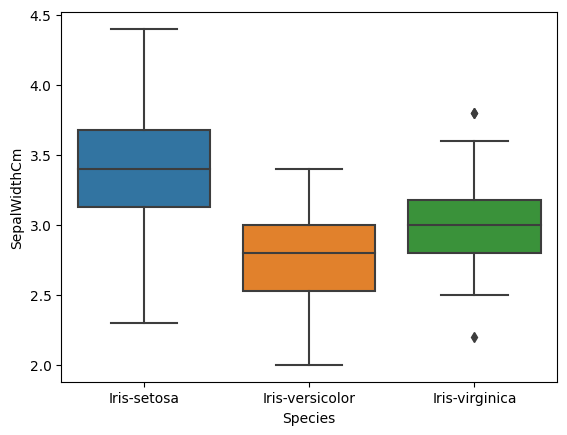

In [5]:
# Box Plot to see outliers
sns.boxplot(x='Species',y='SepalWidthCm',data=df_iris)

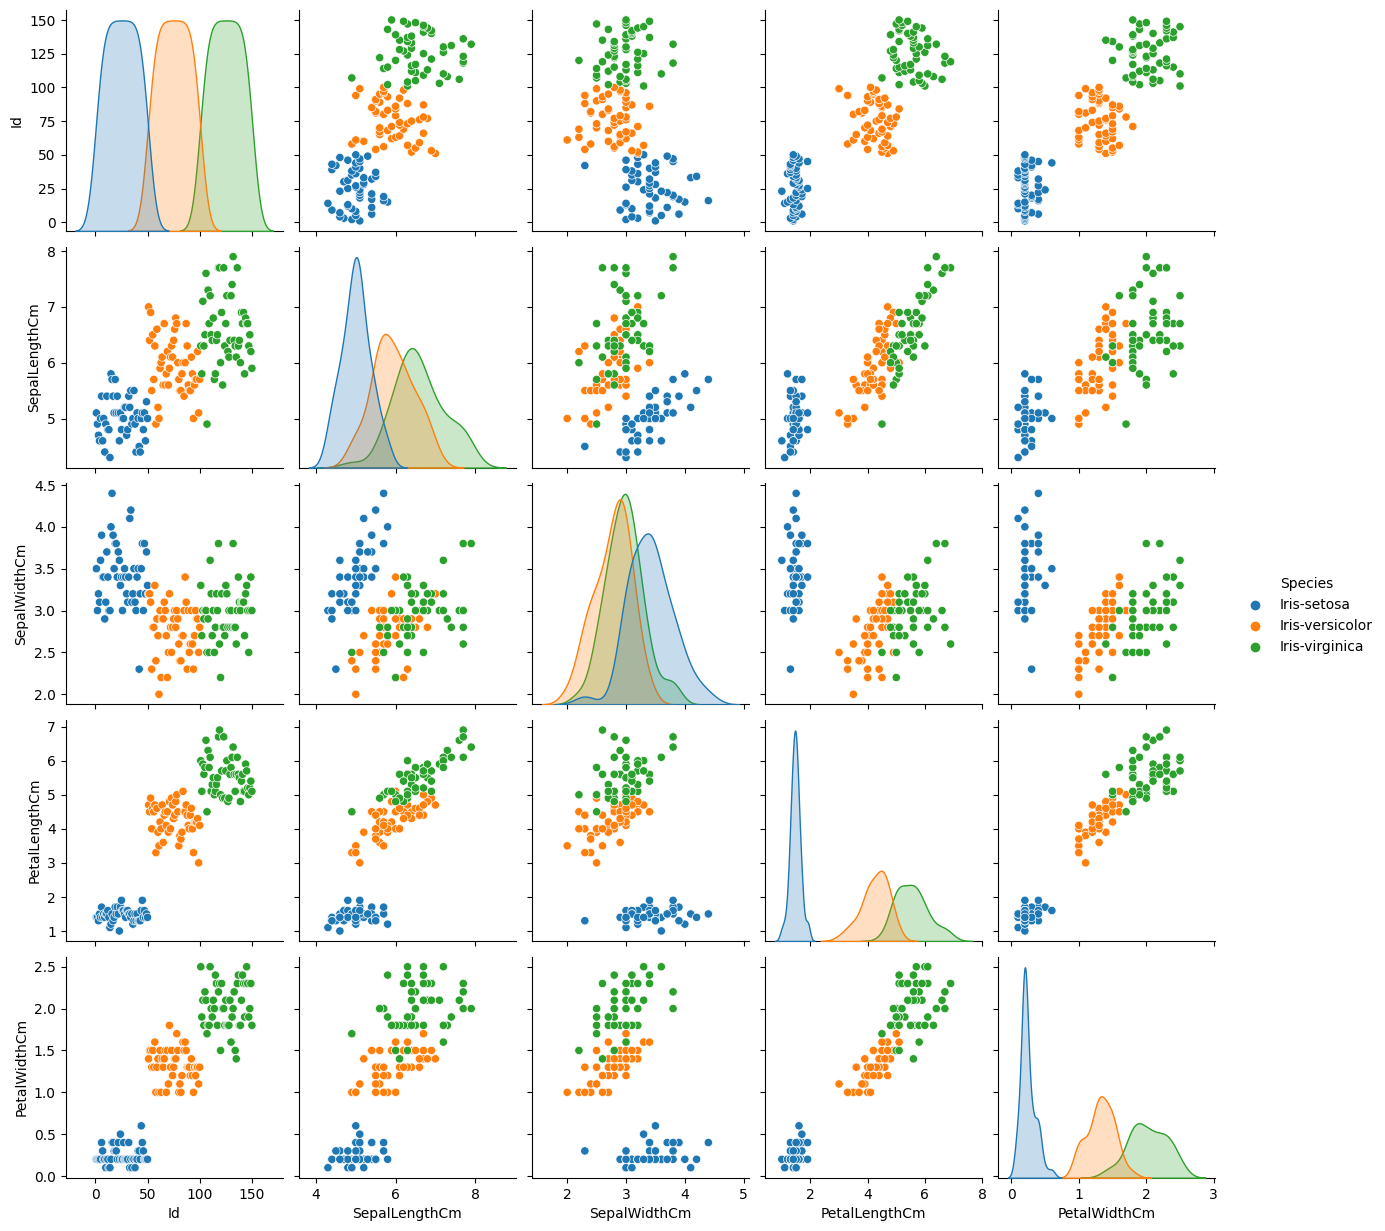

In [6]:
# Pair plot
sns.pairplot(df_iris,hue='Species')

### Inference from visualization

- From the pair plots, consider petal length vs petal width.

- The distinct clusters observed in the scatter plot of petal length vs petal width imply that using petal length and petal width as features for classification tasks, such as the K-Nearest Neighbors (KNN) algorithm, can potentially yield high accuracy. Since the species can be well-differentiated based on these two features, it is likely that the KNN algorithm can accurately classify new samples based on their petal length and width values.

- In KNN algorithm, distance is the key factor. If the cluster are distinct, then the classification becomes efficient.

<ipython-input-7-9a64dc001971>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_iris.corr()


Text(0.5, 1.0, 'Heatmap of Iris Dataset')

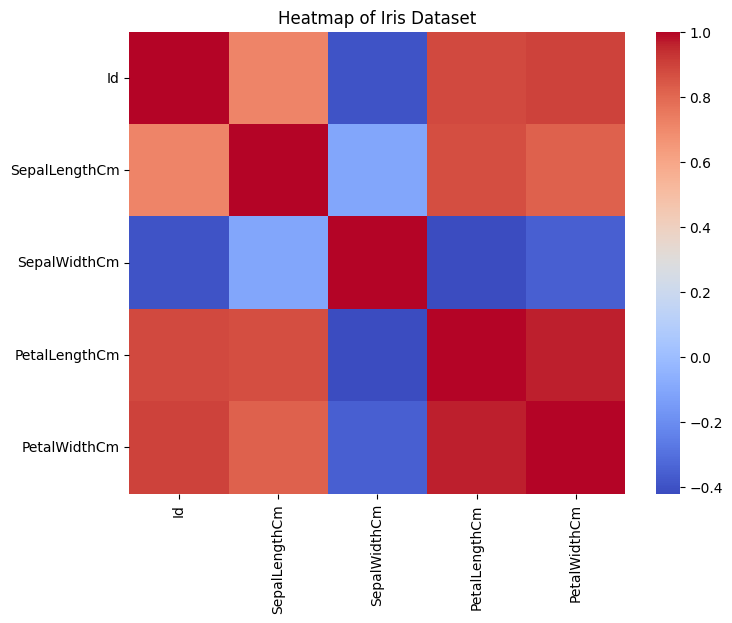

In [7]:
# Calculate the correlation matrix
corr_matrix = df_iris.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(
  corr_matrix, cmap='coolwarm')

# Set title
plt.title('Heatmap of Iris Dataset')

### 4 - Convert categorical feature to Numerical

- Here Species is categorical, we need to convert it into numerical {Iris-setosa,Iris-versicolor,Iris-virginica} --> {0,1,2}
- Beacause computer understand only numbers

In [8]:
label_dict = {'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2}   # Dictionary for mapping

df_iris['ClassLabel'] = df_iris['Species'].map(label_dict) # Uisng map function we create a new  coloumn 'ClassLable'
df_iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,ClassLabel
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


One-Hot Encoding of Categorical Column Using Pandas library


In [9]:
pd.get_dummies(df_iris, columns=["Species"])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ClassLabel,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,0,1,0,0
1,2,4.9,3.0,1.4,0.2,0,1,0,0
2,3,4.7,3.2,1.3,0.2,0,1,0,0
3,4,4.6,3.1,1.5,0.2,0,1,0,0
4,5,5.0,3.6,1.4,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,0,0,1
146,147,6.3,2.5,5.0,1.9,2,0,0,1
147,148,6.5,3.0,5.2,2.0,2,0,0,1
148,149,6.2,3.4,5.4,2.3,2,0,0,1


One Hot Encoding using Sci-kit Learn Library

In [10]:
from sklearn.preprocessing import OneHotEncoder
one_enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot = one_enc.fit_transform(df_iris[['Species']])
df_iris.drop(columns = "Species").join(one_hot)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ClassLabel,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,0,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,0,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,0,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,0,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,0.0,0.0,1.0
146,147,6.3,2.5,5.0,1.9,2,0.0,0.0,1.0
147,148,6.5,3.0,5.2,2.0,2,0.0,0.0,1.0
148,149,6.2,3.4,5.4,2.3,2,0.0,0.0,1.0


Ordinal Encoder

In [11]:
from sklearn.preprocessing import OrdinalEncoder
ordin_enc = OrdinalEncoder().set_output(transform="pandas")
ordin_enc.fit_transform(df_iris)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,ClassLabel
0,0.0,8.0,14.0,4.0,1.0,0.0,0.0
1,1.0,6.0,9.0,4.0,1.0,0.0,0.0
2,2.0,4.0,11.0,3.0,1.0,0.0,0.0
3,3.0,3.0,10.0,5.0,1.0,0.0,0.0
4,4.0,7.0,15.0,4.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,145.0,24.0,9.0,28.0,19.0,2.0,2.0
146,146.0,20.0,4.0,26.0,15.0,2.0,2.0
147,147.0,22.0,9.0,28.0,16.0,2.0,2.0
148,148.0,19.0,13.0,30.0,19.0,2.0,2.0


In [12]:
df_iris=df_iris.drop(['Species'], axis=1) # Drop 'Species' column

Euclidean Distance

In [13]:
point1 = np.array([2, 4, 4, 6])
point2 = np.array([5, 5, 7, 8])

def euclidean(point1, point2):
  return np.sqrt(np.sum(np.square(point1 - point2)))

euclidean(point1, point2)

4.795831523312719

Cosine distance

(A.B) / (||A||.||B||)

In [14]:
from numpy.linalg import norm

A = np.array([2,1,2,3,2,9])
B = np.array([3,4,2,4,5,5])
np.dot(A,B)/(norm(A)*norm(B))

0.8188504723485274

Norm

Measure the size of a vector

Quantify the magnitude of a vector

In [15]:
from IPython.display import Image
Image(url="https://i.ytimg.com/vi/3i3klTnGZZM/sddefault.jpg")

In [16]:
np.sqrt(np.sum(np.square(A)))

10.14889156509222

Manhattan distance

In [17]:
def manhattan(a, b):
    return sum(abs(a-b))

manhattan(point1,point2)

9

In [18]:
def manhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))

A = [2, 4, 4, 6]
B = [5, 5, 7, 8]

manhattan(A, B)

9

### 5 - Shuffle Dataset and Create Training and Test Subsets using Scikit - Learn



In [19]:
from sklearn.model_selection import train_test_split

X=df_iris[['PetalLengthCm','PetalWidthCm']] # We only need two feature [ Petal Lenght and Petal Width]
y=df_iris[['ClassLabel']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,shuffle=True, stratify = y)


## 6 - Fit k-Nearest Neighbor Model

- Next, we are going to use the `KNeighborsClassifier` class from scikit-learn and instantiate a new KNN object, which we call `knn_model`. Then, we "fit" this model the training dataset

- ** The default distance parameter id is Euclidean distance **

In [20]:
from sklearn.neighbors import KNeighborsClassifier # import the KNN classifier

def knn(n_neig, X_train, y_train, X_test, y_test, distance):
  knn_model = KNeighborsClassifier(n_neighbors=n_neig, metric=distance)
  knn_model.fit(X_train, y_train) # Fitting the training data into the model.

  # 7
  y_pred = knn_model.predict(X_test)
  print(f'Model prediction: {y_pred}')
  # 8
  num_correct_predictions = (y_pred == y_test['ClassLabel']).sum() # Number of correct predicton i.e y_predict==y_test
  accuracy = (num_correct_predictions / y_test.shape[0]) * 100

  print(f'Test set accuracy: {accuracy:.2f}%')
  return knn_model

In [21]:
# euclidean
# cosine
knn_model = knn(3, X_train, y_train, X_test, y_test, distance="euclidean")
knn_model

Model prediction: [2 2 1 1 2 0 0 1 0 0 2 0 2 0 1 0 2 2 0 0 0 0 0 1 0 1 2 0 1 2 2 2 2 1 1 1 2
 2 2 0 2 1 1 2 1]
Test set accuracy: 95.56%


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

### 7 - Use kNN Model to Make Predictions

After "fitting" the KNN model, we can now make predictions on new data points that the model has not seen before. The test set represents such data points. Of course, we have labels for the test set as well, but we only use these labels to evaluate the model -- i.e., we compare the predictions to the true labels in the test set in order to find out how good the model is:

### 8 - Accuracy of the Model

In general, accuracy is a common metric used to evaluate the performance of a classification model. It measures the proportion of correct predictions made by the model compared to the total number of predictions.

The accuracy of a model can be defined as follows:

Accuracy = (Number of correct predictions) / (Total number of predictions)

The accuracy of a model trained using the K-Nearest Neighbors (KNN) algorithm on the Iris dataset with petal length and petal width as features can vary depending on various factors such as the choice of hyperparameters (k values, distance parameter), dataset splitting, and the size and quality of the dataset.



Since we got 95.56% accuracy we can say that our model performs well on the given dataset.

### 9 - Visualize the decision boundaries of a KNN model trained on the Iris dataset.

Visualizing the decision boundary helps in interpreting the model, evaluating its performance, comparing different models, understanding complex patterns, and communicating the results effectively.

Usually, in machine learning, we work with datasets that have more then 2 feature variables. For educational purposes, however, we chose a very simple dataset considering  only two features  here (the petal length and the petal width of Iris flowers).

The plot_decision_regions function is a visualization tool provided by the mlxtend.plotting module. It is used to plot decision boundaries for classification models. Given a trained classifier and a dataset, it can generate a plot that shows the decision regions of the classifier, where each region corresponds to a different class.

In [22]:
!pip install mlxtend --upgrade

Restart the Runtime to update the installed pakages

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


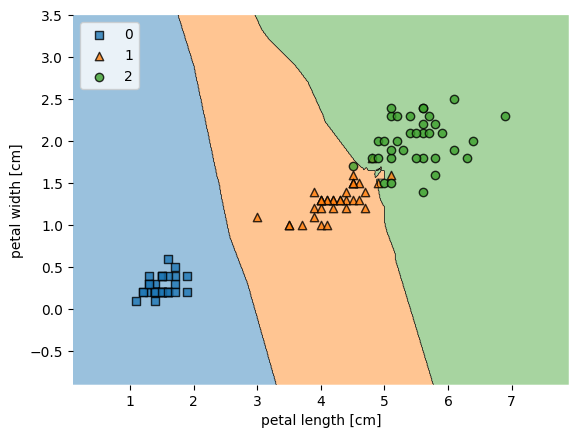

In [23]:
from mlxtend.plotting import plot_decision_regions

# Convert the training features and labels to numpy arrays
X_t=X_train.to_numpy()
y_t=y_train['ClassLabel'].to_numpy()

# Plot decision regions
plot_decision_regions(X_t, y_t, knn_model)
# Set y-axis limits
plt.ylim(X_t[:, 1].min() - 1, X_t[:, 1].max() + 1)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


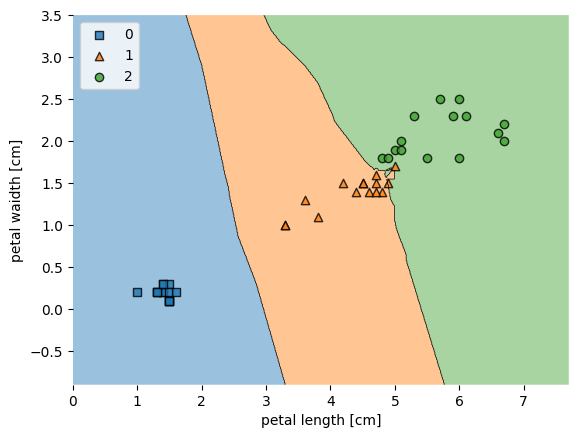

In [24]:
# Convert the Testing features and labels to numpy arrays
X_t=X_test.to_numpy()
y_t=y_test['ClassLabel'].to_numpy()
# Plot decision regions
plot_decision_regions(X_t, y_t, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal waidth [cm]')
plt.legend(loc='upper left')
plt.show()

Cross Validation

In [25]:
from IPython.display import Image
Image(url="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png")

In [26]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric = "euclidean")
st_kf = StratifiedKFold(n_splits= 3)
kfolds = st_kf.split(X, y)
scores = cross_val_score(knn_model, X, y, cv=st_kf)
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.98 0.94 0.98]
Average Cross Validation score :0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [28]:
kaggle_dataset = "/content/drive/MyDrive/ColabNotebooks/Kaggle_dataset-1.csv"
df = pd.read_csv(kaggle_dataset)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [30]:
mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() #?
df['Outlet_Size'].fillna(mode[0], inplace =True)

In [31]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)

In [32]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [33]:
from sklearn.preprocessing import Normalizer
norm_knn_regression_data = Normalizer().fit_transform(X)
norm_knn_regression_data

array([[4.61636699e-03, 7.96561620e-06, 1.24001177e-01, ...,
        4.96383548e-04, 0.00000000e+00, 0.00000000e+00],
       [2.94587490e-03, 9.59311024e-06, 2.40194298e-02, ...,
        0.00000000e+00, 4.97614003e-04, 0.00000000e+00],
       [8.73215236e-03, 8.36294448e-06, 7.06645687e-02, ...,
        4.98980135e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.28457886e-03, 1.75419456e-05, 4.24373618e-02, ...,
        4.98545175e-04, 0.00000000e+00, 0.00000000e+00],
       [3.58410533e-03, 7.21894718e-05, 5.12677187e-02, ...,
        0.00000000e+00, 4.97101988e-04, 0.00000000e+00],
       [7.40562272e-03, 2.24561899e-05, 3.77621709e-02, ...,
        5.00379913e-04, 0.00000000e+00, 0.00000000e+00]])

In [34]:
x_train , x_test, y_train, y_test = train_test_split(norm_knn_regression_data, y, test_size = 0.3,  random_state = 0)#, stratify=y)

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
predicted_values = knn_model.predict(x_test)

In [36]:
predict_df = pd.DataFrame({"x_test" : y_test, "prediction" : predicted_values})
predict_df.head()

,x_test,prediction
4931,1426.1436,2535.36640
4148,1201.7690,1514.16236
7423,1836.2764,1971.83328
4836,2410.8618,1673.42172
944,1549.9824,3308.22704


Mean Squared Error (MSE)


In [37]:
from IPython.display import Image
Image(url="https://www.gstatic.com/education/formulas2/553212783/en/mean_squared_error.svg")

MSE and Decision Boundaries

They are used for different purposes

MSE: regression tasks

Decision Boundaries: classification tasks

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate MSE
print("Mean Squared Error = ", mean_squared_error(predict_df.prediction, predict_df.x_test))

Mean Squared Error =  1851495.2924997585


R-squared (r2)

Evaluate the goodness of fit of a regression model

In [39]:
# Calculate r2
r2_score(predict_df.prediction, predict_df.x_test)

-0.0722247862672043

RMSE value for k=  1 is: 1703.8869559153904
RMSE value for k=  2 is: 1498.0487453427286
RMSE value for k=  3 is: 1410.3007755590204
RMSE value for k=  4 is: 1372.7369028565595
RMSE value for k=  5 is: 1360.696620301439
RMSE value for k=  6 is: 1341.9912814416598
RMSE value for k=  7 is: 1333.9437716897223
RMSE value for k=  8 is: 1336.3357545408007
RMSE value for k=  9 is: 1334.2593854729623
RMSE value for k=  10 is: 1332.5596830805157
RMSE value for k=  11 is: 1336.2275302818193
RMSE value for k=  12 is: 1338.0066587708302
RMSE value for k=  13 is: 1334.986293747531
RMSE value for k=  14 is: 1336.8805533423254
RMSE value for k=  15 is: 1341.4949315957117
RMSE value for k=  16 is: 1344.7799446610163
RMSE value for k=  17 is: 1349.0683854008064
RMSE value for k=  18 is: 1350.0046738790707
RMSE value for k=  19 is: 1353.842284061001
RMSE value for k=  20 is: 1361.591693053754


<Axes: >

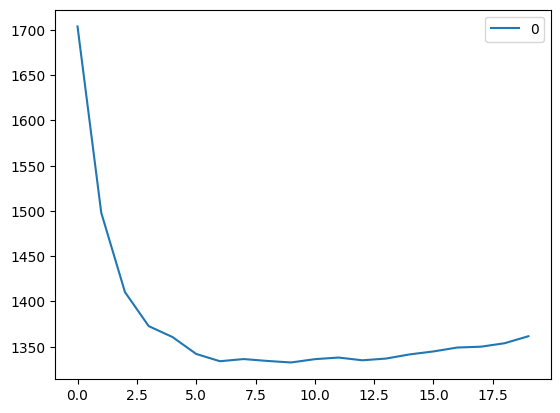

In [40]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# Practice

1 - Import libraries

2 - Load the wine dataset from sklearn

3 - Create a DataFrame from the dataset and add a label to it

4 - Plot Box plot using label and alcohol and tell if there are outliers or not

5 - Calculate the correlation matrix and write 3 most correlated features

6 - Create X and y and Normalize X using either StandardScaler or Normalizer

7 - Divide the data to train and test the dataset with a test size of 0.30, while shuffling the dataset

8 - Train KNN using Manhattan distance(you can change the n_neighbors)

9 - Print accuracy

10 - Check if the result gets better with k-fold (5-fold)

In [41]:
# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [42]:
# 2
wine = load_wine()

In [43]:
# 3
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target #Assigning target column
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


<Axes: xlabel='target', ylabel='alcohol'>

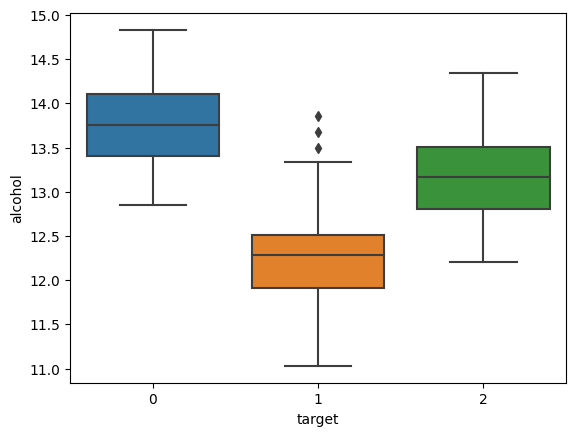

In [44]:
# 4
sns.boxplot(x='target',y='alcohol',data=df)

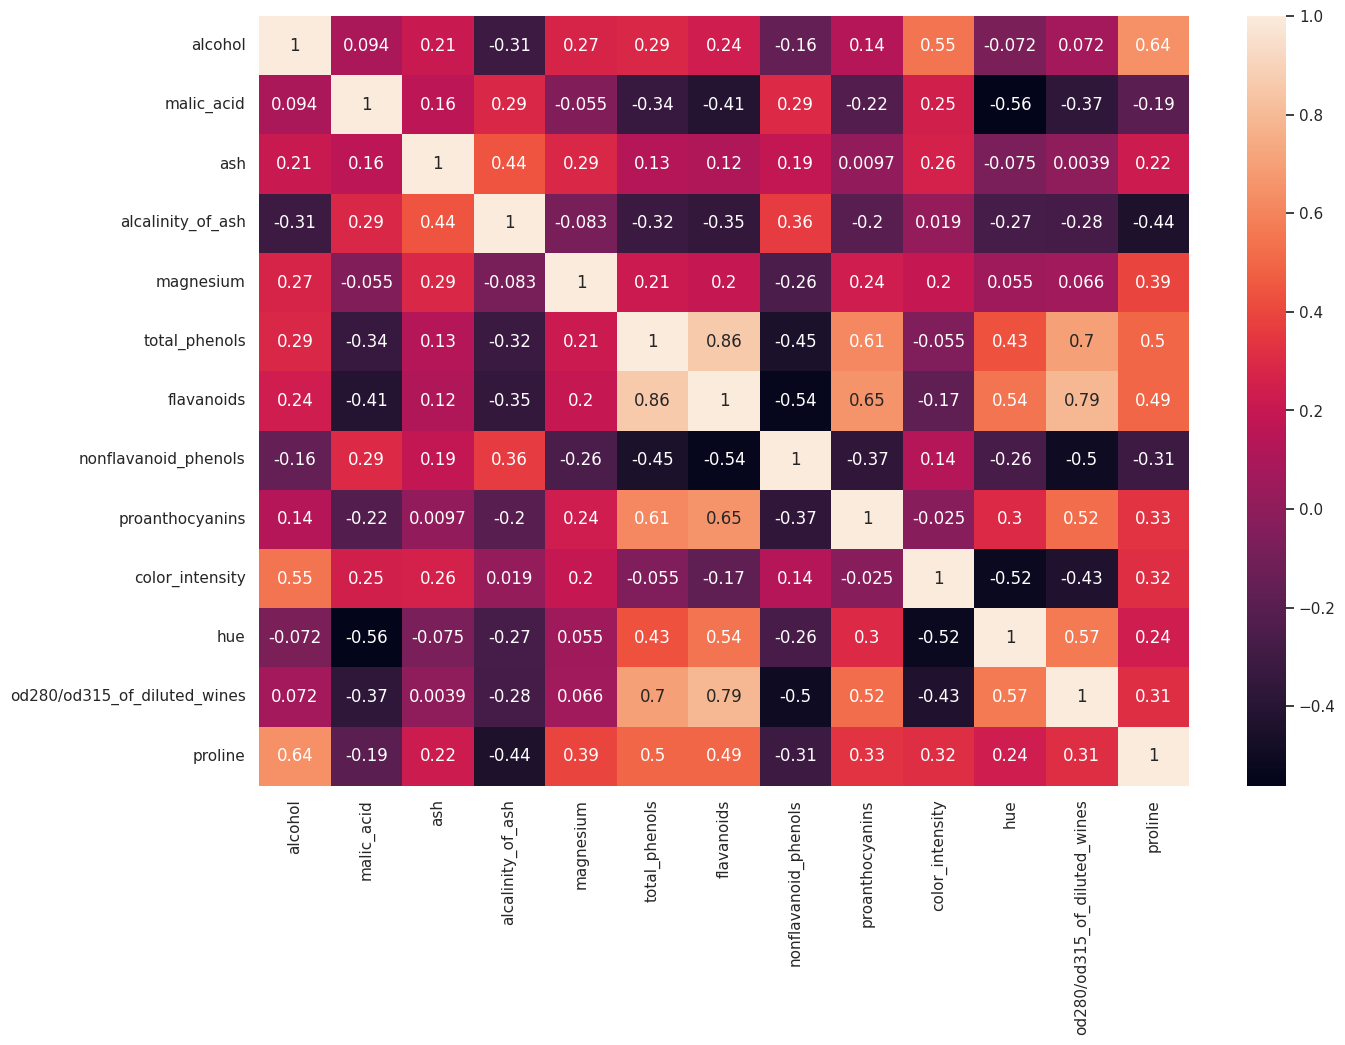

In [45]:
# 5
sns.set(rc={'figure.figsize':(15,10)})
# correlation_matrix = df.corr()
sns.heatmap(df.iloc[:,:-1].corr(), annot=True)
plt.show()

In [46]:
# 6 StandardScaler, Normalizer
y = df['target']
X = df.drop('target',axis=1)
norm_scale = StandardScaler()
X_sc = norm_scale.fit_transform(X)

In [47]:
# 7 - Use stratified sampling when splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.30, shuffle=True, random_state=0, stratify=y)


In [48]:
# 8
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [49]:
# 9
num_correct_predictions = (y_pred == y_test).sum() # Number of correct predicton i.e y_predict==y_test
accuracy = (num_correct_predictions / y_test.shape[0]) * 100

print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 98.15%


In [50]:
# 10
knn_model = KNeighborsClassifier(n_neighbors=3)
st_kf = StratifiedKFold(n_splits= 5)
kfolds = st_kf.split(X, y)
scores = cross_val_score(knn_model, X, y, cv=st_kf)
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.63888889 0.69444444 0.66666667 0.65714286 0.85714286]
Average Cross Validation score :0.7028571428571428


Please explain in detail your understanding of the entire activity in **atleast 200 words.**

###KNN is a lazy classifier, it doesn't learn the data but it keeps data in prediction.
###It selects classes based on majority.
###Decision boundary helps to separate different data classes.
###In K neighbors neighbor we can calculate the distance using Euclidean or Manhattan distances. In this activity, we have used the Manhattan method to find the distance.
###Euclidean is a square root as Manhattan is an absolute square, there is no much difference between them.
###It is important to find the right K value. If the k is too low then overfitting occurs and if k is too high then the cases of under fitting occur.
###Heatmap is used to find the correlation features.
###According to the heatmap above we can observe that flavanoid, total_phenols, od280/od315_of_diluted_wines are highly correlated with each other.
###flavanoid and total_phenols have 0.86, flavanoid and od280/0d315_of_diluted_wine have 0.7, and total_phenols and d280/0d315_of_diluted_wine have 0.7
###To compare multiple distributions we use boxplot.
###We got 3 outliers when we saw the orange box, but if we compare it with the remaining boxes there are no outliers.
###We trained KNN using Manhattan distance.
###We can achieve the highest accuracy of 98.15% when the value of k is 3 or 4.
###In the case of 5 nearest neighbors the accuracy drops to 70.28%.

